<a href="https://colab.research.google.com/github/habibaelgendy/Thesis/blob/main/latest_Copy_of_Habiba_RF_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/habibaelgendy/Thesis/main/Updated%20responses%20-%20Copy.csv')

df.head()

<ipython-input-154-2acdb52d5469>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,Timestamp,Age,Gender,Nationality,High_School_System,High_School_Grade,Economic_Status,Scholarship,Attendance,Failed_Courses,...,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards,University_System
0,3/26/2023 17:46,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,>60%,0,...,4,Yes,Yes,No,4,5,3,3,4,NaN
1,3/26/2023 17:48,18-24 years old,Female,Egyptian,IGCSE,65%-69%,High,No,>40%,0,...,3,No,Yes,No,3,3,3,3,3,NaN
2,3/27/2023 19:05,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,...,2,Yes,No,No,5,5,5,2,5,NaN
3,3/27/2023 19:06,18-24 years old,Female,egyptian,IGCSE,90%-100%,Medium,No,>80%,3,...,4,No,Yes,No,4,4,5,1,4,NaN
4,3/27/2023 19:07,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,...,4,Yes,Yes,Yes,5,5,2,2,4,NaN


In [155]:
#Dropping columns
df.drop(['Timestamp', 'GPA', 'University_System', 'High_School_System', 'High_School_Grade', 'Economic_Status', 'Scholarship'],
             axis="columns", inplace=True)


In [156]:
df.isnull().sum()

Age                         0
Gender                      0
Nationality                 0
Attendance                  0
Failed_Courses              0
Grade                       6
Rank                       18
Extroversion                0
Calmness                    0
Failure_Tolerance           0
Self_Confidence             0
Procrastination             0
Self_Motivation             0
Peer_Pressure               0
Group_Study                 0
Peer_Support                0
Teacher_Support             0
Teacher_Closeness           0
School_Belongingness        0
Teacher_Knowledge           0
Teacher_Self_Motivation     0
Teacher_Self_Confidence     0
Teacher_Openness            0
Fear_Of_Failure             0
Working_Hard                0
Pass_Course                 0
Avoiding_Punishment         0
Rewards                     0
dtype: int64

In [157]:
df = df.dropna()

In [158]:
df['Rank'] = df['Rank'].astype('category').cat.codes
df

,Age,Gender,Nationality,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24 years old,Female,Egyptian,>60%,0,A+,0,4,4,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
2,18-24 years old,Female,Egyptian,>80%,0,B+,3,4,3,2,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24 years old,Female,egyptian,>80%,3,B-,1,2,5,5,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24 years old,Female,Egyptian,>80%,0,A,0,4,3,2,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
5,18-24 years old,Female,Egyptian,>80%,0,A-,3,4,3,4,...,Yes,3,No,No,No,5,4,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,18-24 years old,Male,Egyptian,> 60%,0,A,0,5,2,4,...,Yes,4,Yes,Yes,No,4,3,1,1,5
183,18-24 years old,Female,Egyptian,> 80%,1,B,3,4,4,4,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24 years old,Female,Egyptian,> 80%,0,A,0,3,2,2,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24 years old,Female,Egyptian/ Japanese,> 80%,0,B-,3,3,4,4,...,Yes,4,No,No,No,4,3,4,1,4


In [159]:
#Knowing the number of unique values and what are they in the columns.
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

df

Age: Number of unique values 4
Gender : Number of unique values 2
Nationality: Number of unique values 13
Attendance: Number of unique values 5
Failed_Courses: Number of unique values 14
Grade: Number of unique values 10
Rank: Number of unique values 4
Extroversion: Number of unique values 5
Calmness: Number of unique values 5
Failure_Tolerance: Number of unique values 5
Self_Confidence: Number of unique values 5
Procrastination: Number of unique values 5
Self_Motivation : Number of unique values 5
Peer_Pressure: Number of unique values 5
Group_Study: Number of unique values 2
Peer_Support: Number of unique values 2
Teacher_Support: Number of unique values 2
Teacher_Closeness: Number of unique values 5
School_Belongingness: Number of unique values 2
Teacher_Knowledge: Number of unique values 5
Teacher_Self_Motivation: Number of unique values 2
Teacher_Self_Confidence: Number of unique values 2
Teacher_Openness: Number of unique values 2
Fear_Of_Failure: Number of unique values 5
Workin

,Age,Gender,Nationality,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24 years old,Female,Egyptian,>60%,0,A+,0,4,4,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
2,18-24 years old,Female,Egyptian,>80%,0,B+,3,4,3,2,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24 years old,Female,egyptian,>80%,3,B-,1,2,5,5,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24 years old,Female,Egyptian,>80%,0,A,0,4,3,2,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
5,18-24 years old,Female,Egyptian,>80%,0,A-,3,4,3,4,...,Yes,3,No,No,No,5,4,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,18-24 years old,Male,Egyptian,> 60%,0,A,0,5,2,4,...,Yes,4,Yes,Yes,No,4,3,1,1,5
183,18-24 years old,Female,Egyptian,> 80%,1,B,3,4,4,4,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24 years old,Female,Egyptian,> 80%,0,A,0,3,2,2,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24 years old,Female,Egyptian/ Japanese,> 80%,0,B-,3,3,4,4,...,Yes,4,No,No,No,4,3,4,1,4


In [160]:
#Replacing the values

df['Attendance'] = df['Attendance'].str.replace('>','')
df['Attendance'] = df['Attendance'].str.replace('%','').astype(float)
df['Attendance'] = (df['Attendance'] / 100).round(2)

df['Nationality']=df['Nationality'].replace(to_replace=["Egyptian ", "egyptian", "Egypt", "egyptian ", "Egyptain ", "Egyption ", "Egypt ", "Egyptian/ Japanese "], value="Egyptian" )
df['Failed_Courses']=df['Failed_Courses'].replace(to_replace=["None", "Zero", "none", "None "], value="0" )
df['Failed_Courses']=df['Failed_Courses'].replace(to_replace=["One"], value="1" )
df['Failed_Courses']=df['Failed_Courses'].astype(int)

df['Age']=df['Age'].replace(to_replace=["18-24 years old"], value="18-24" )
df['Age']=df['Age'].replace(to_replace=["25-35 years old"], value="25-35" )


df

,Age,Gender,Nationality,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24,Female,Egyptian,0.6,0,A+,0,4,4,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
2,18-24,Female,Egyptian,0.8,0,B+,3,4,3,2,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24,Female,Egyptian,0.8,3,B-,1,2,5,5,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24,Female,Egyptian,0.8,0,A,0,4,3,2,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
5,18-24,Female,Egyptian,0.8,0,A-,3,4,3,4,...,Yes,3,No,No,No,5,4,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,18-24,Male,Egyptian,0.6,0,A,0,5,2,4,...,Yes,4,Yes,Yes,No,4,3,1,1,5
183,18-24,Female,Egyptian,0.8,1,B,3,4,4,4,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24,Female,Egyptian,0.8,0,A,0,3,2,2,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24,Female,Egyptian,0.8,0,B-,3,3,4,4,...,Yes,4,No,No,No,4,3,4,1,4


In [161]:
df = df.drop("Nationality", axis='columns')

In [162]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      170 non-null    object 
 1   Gender                   170 non-null    object 
 2   Attendance               170 non-null    float64
 3   Failed_Courses           170 non-null    int64  
 4   Grade                    170 non-null    object 
 5   Rank                     170 non-null    int8   
 6   Extroversion             170 non-null    int64  
 7   Calmness                 170 non-null    int64  
 8   Failure_Tolerance        170 non-null    int64  
 9   Self_Confidence          170 non-null    int64  
 10  Procrastination          170 non-null    int64  
 11  Self_Motivation          170 non-null    int64  
 12  Peer_Pressure            170 non-null    int64  
 13  Group_Study              170 non-null    object 
 14  Peer_Support             1

In [163]:
df.isnull().sum()

Age                        0
Gender                     0
Attendance                 0
Failed_Courses             0
Grade                      0
Rank                       0
Extroversion               0
Calmness                   0
Failure_Tolerance          0
Self_Confidence            0
Procrastination            0
Self_Motivation            0
Peer_Pressure              0
Group_Study                0
Peer_Support               0
Teacher_Support            0
Teacher_Closeness          0
School_Belongingness       0
Teacher_Knowledge          0
Teacher_Self_Motivation    0
Teacher_Self_Confidence    0
Teacher_Openness           0
Fear_Of_Failure            0
Working_Hard               0
Pass_Course                0
Avoiding_Punishment        0
Rewards                    0
dtype: int64

In [164]:
df = df.dropna()

In [165]:
df.isnull().sum()

Age                        0
Gender                     0
Attendance                 0
Failed_Courses             0
Grade                      0
Rank                       0
Extroversion               0
Calmness                   0
Failure_Tolerance          0
Self_Confidence            0
Procrastination            0
Self_Motivation            0
Peer_Pressure              0
Group_Study                0
Peer_Support               0
Teacher_Support            0
Teacher_Closeness          0
School_Belongingness       0
Teacher_Knowledge          0
Teacher_Self_Motivation    0
Teacher_Self_Confidence    0
Teacher_Openness           0
Fear_Of_Failure            0
Working_Hard               0
Pass_Course                0
Avoiding_Punishment        0
Rewards                    0
dtype: int64

In [166]:
df['Age'] = pd.Categorical(df['Age'], 
                                      categories=['below 18', '18-24', '25-35', 'above 35'], 
                                      ordered=True)


<ipython-input-225-7462da0c6a41>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

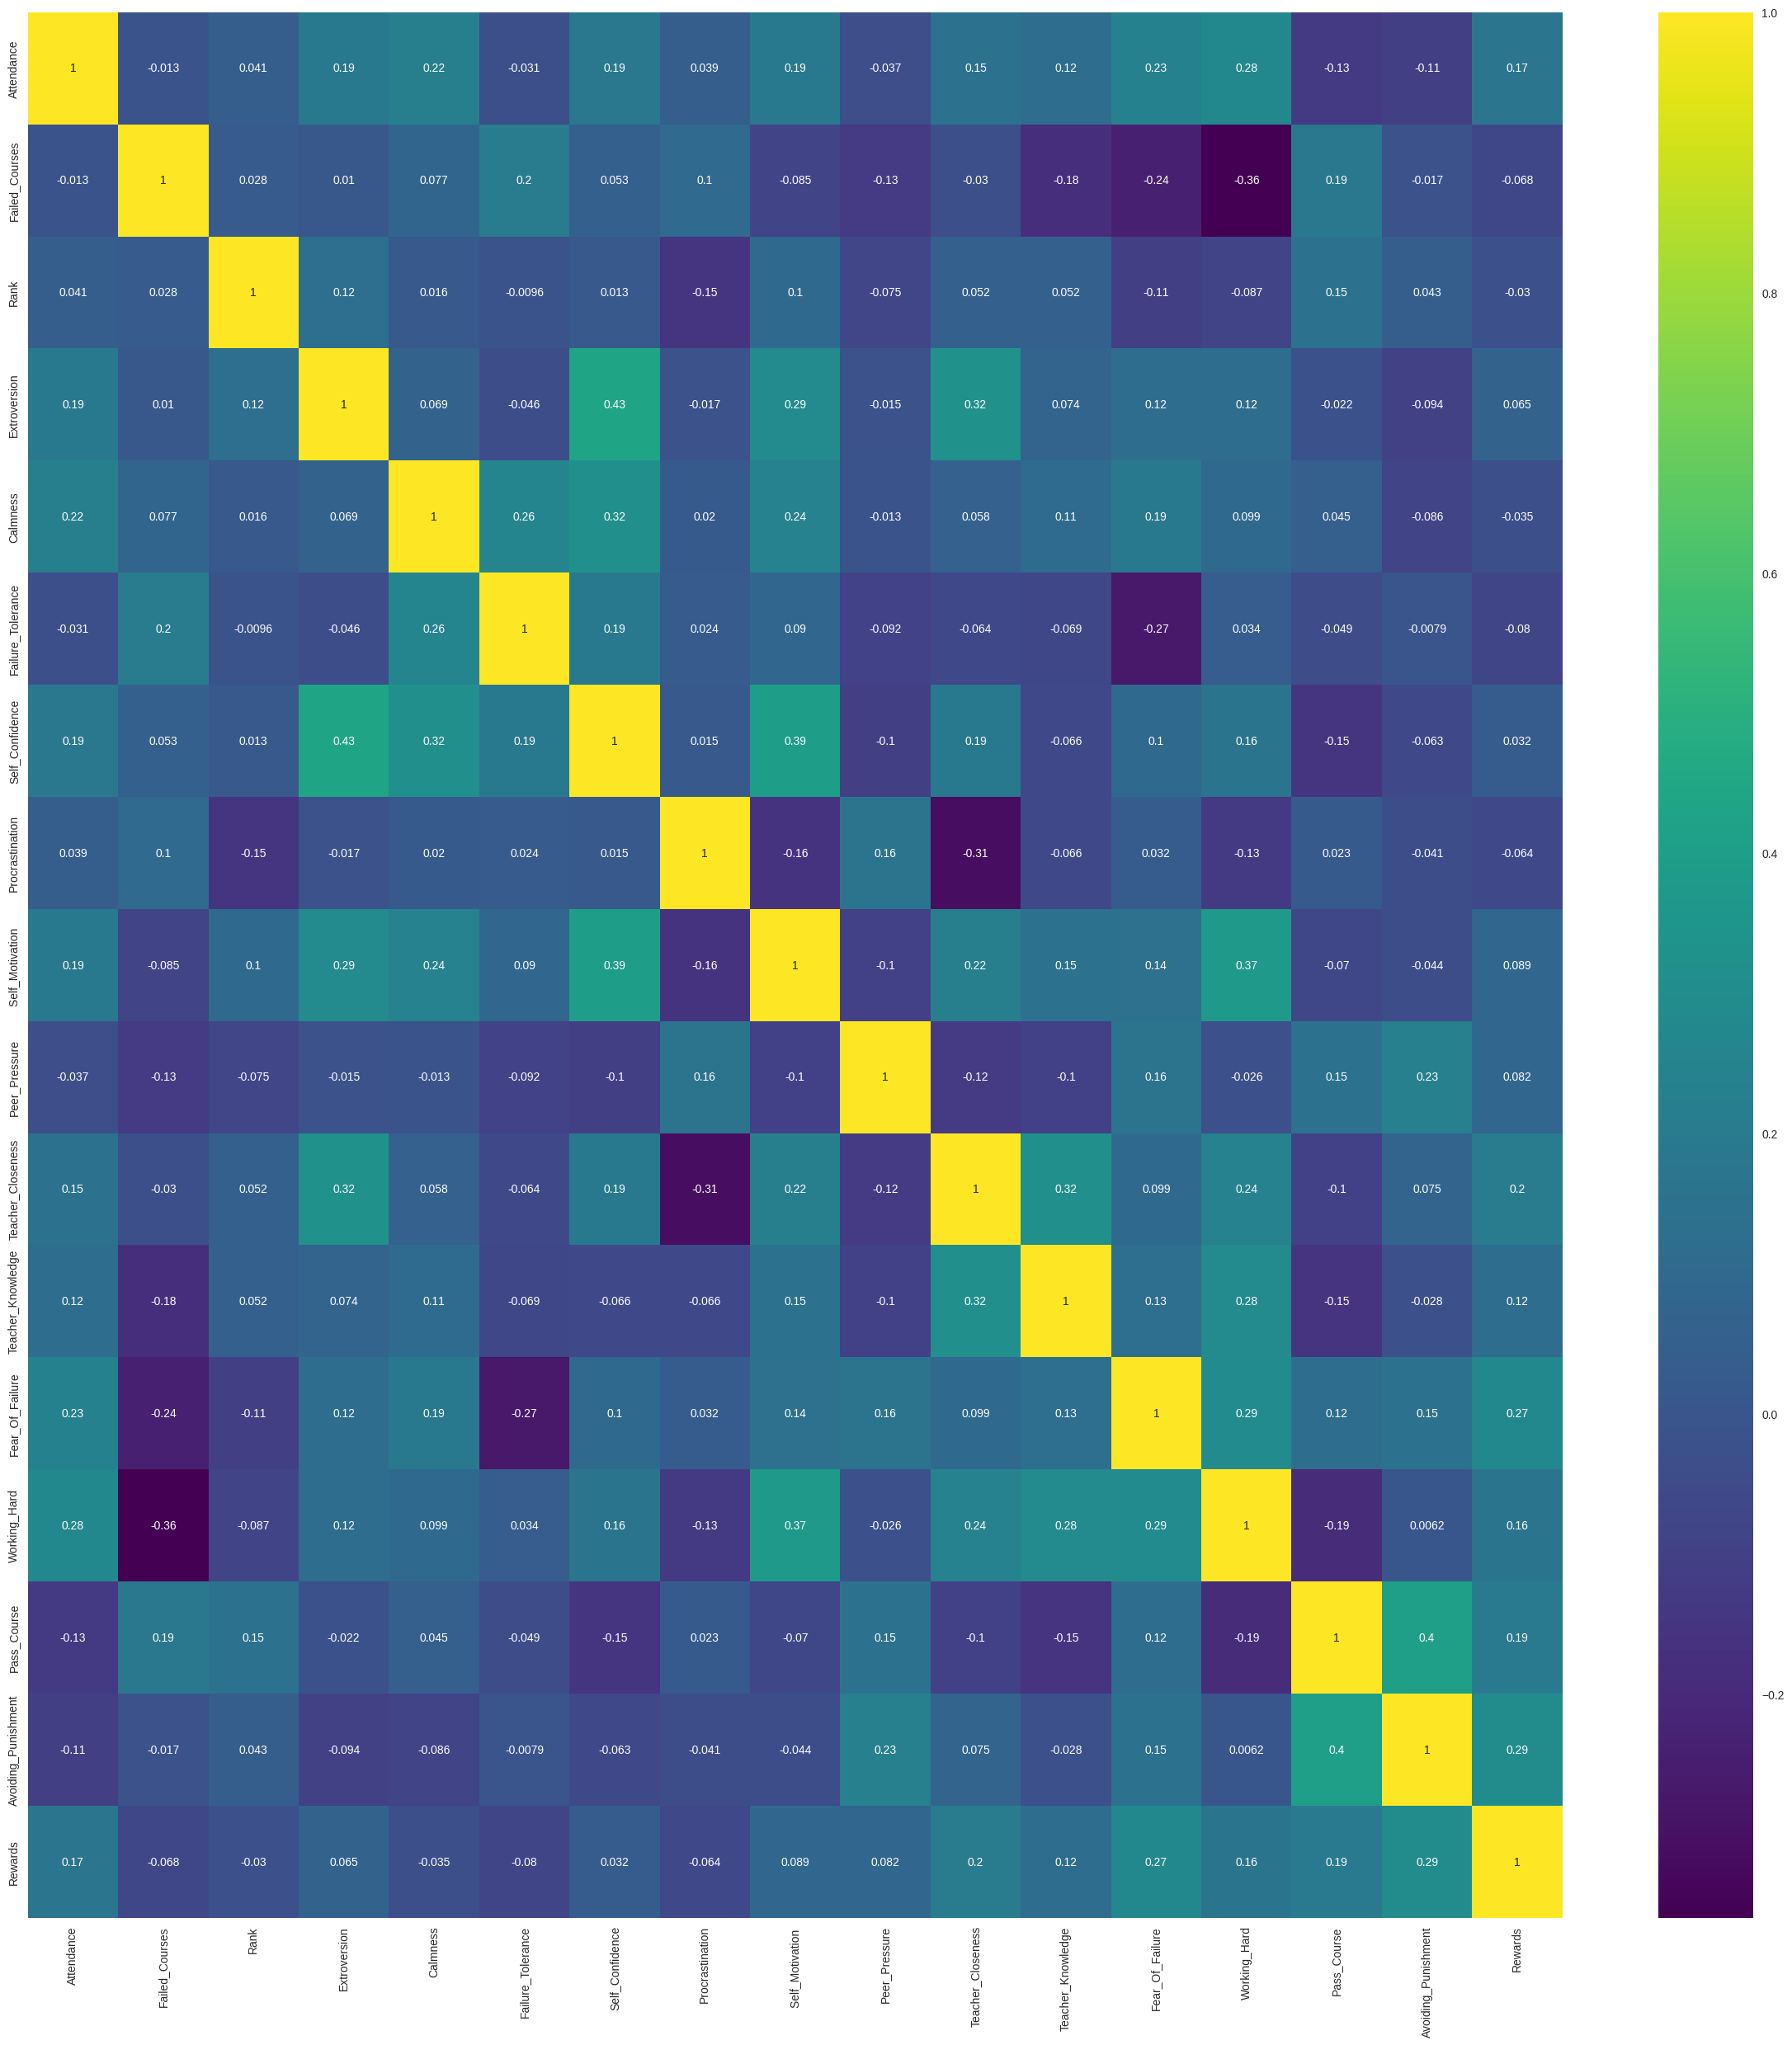

In [225]:
# to improve the plot's clarity, it will be set to a larger size using the line below
plt.figure(figsize=(30,30))

corr = df.corr()
corr

sns.heatmap(corr, cmap='viridis', annot=True)

label encoding

In [168]:
df_encoded = df.copy()
df_encoded['Age'] = df_encoded['Age'].astype('category').cat.codes

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      170 non-null    int8   
 1   Gender                   170 non-null    object 
 2   Attendance               170 non-null    float64
 3   Failed_Courses           170 non-null    int64  
 4   Grade                    170 non-null    object 
 5   Rank                     170 non-null    int8   
 6   Extroversion             170 non-null    int64  
 7   Calmness                 170 non-null    int64  
 8   Failure_Tolerance        170 non-null    int64  
 9   Self_Confidence          170 non-null    int64  
 10  Procrastination          170 non-null    int64  
 11  Self_Motivation          170 non-null    int64  
 12  Peer_Pressure            170 non-null    int64  
 13  Group_Study              170 non-null    object 
 14  Peer_Support             1

In [169]:
categorical_columns = df.select_dtypes(include= [object, 'category']).columns
df_encoded = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           dtype='int8')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 187
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Attendance                   170 non-null    float64
 1   Failed_Courses               170 non-null    int64  
 2   Rank                         170 non-null    int8   
 3   Extroversion                 170 non-null    int64  
 4   Calmness                     170 non-null    int64  
 5   Failure_Tolerance            170 non-null    int64  
 6   Self_Confidence              170 non-null    int64  
 7   Procrastination              170 non-null    int64  
 8   Self_Motivation              170 non-null    int64  
 9   Peer_Pressure                170 non-null    int64  
 10  Teacher_Closeness            170 non-null    int64  
 11  Teacher_Knowledge            170 non-null    int64  
 12  Fear_Of_Failure              170 non-null    int64  
 13  Working_Hard        

In [170]:
df_encoded.drop(['Gender _Female', 'Group_Study_No', 'Peer_Support_No', 'Teacher_Support_No',
                 'School_Belongingness_No', 'Teacher_Self_Motivation_No', 'Teacher_Self_Confidence_No', 'Teacher_Openness_No'], axis='columns', inplace=True)
df_encoded.columns

Index(['Attendance', 'Failed_Courses', 'Rank', 'Extroversion', 'Calmness',
       'Failure_Tolerance', 'Self_Confidence', 'Procrastination',
       'Self_Motivation ', 'Peer_Pressure', 'Teacher_Closeness',
       'Teacher_Knowledge', 'Fear_Of_Failure', 'Working_Hard', 'Pass_Course',
       'Avoiding_Punishment', 'Rewards', 'Age_below 18', 'Age_18-24',
       'Age_25-35', 'Age_above 35', 'Gender _Male', 'Grade_A', 'Grade_A+',
       'Grade_A-', 'Grade_B', 'Grade_B+', 'Grade_B-', 'Grade_C', 'Grade_C+',
       'Grade_C-', 'Grade_D', 'Group_Study_Yes', 'Peer_Support_Yes',
       'Teacher_Support_Yes', 'School_Belongingness_Yes',
       'Teacher_Self_Motivation_Yes', 'Teacher_Self_Confidence_Yes',
       'Teacher_Openness_Yes'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      169 non-null    category
 1   Gender                   170 non-null    object  
 2   Attendance               170 non-null    float64 
 3   Failed_Courses           170 non-null    int64   
 4   Grade                    170 non-null    object  
 5   Rank                     170 non-null    int8    
 6   Extroversion             170 non-null    int64   
 7   Calmness                 170 non-null    int64   
 8   Failure_Tolerance        170 non-null    int64   
 9   Self_Confidence          170 non-null    int64   
 10  Procrastination          170 non-null    int64   
 11  Self_Motivation          170 non-null    int64   
 12  Peer_Pressure            170 non-null    int64   
 13  Group_Study              170 non-null    object  
 14  Peer_Suppo

In [172]:
df_corr=df.copy()
df_corr['Age'] = df_corr['Age'].astype('category').cat.codes

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      170 non-null    int8   
 1   Gender                   170 non-null    object 
 2   Attendance               170 non-null    float64
 3   Failed_Courses           170 non-null    int64  
 4   Grade                    170 non-null    object 
 5   Rank                     170 non-null    int8   
 6   Extroversion             170 non-null    int64  
 7   Calmness                 170 non-null    int64  
 8   Failure_Tolerance        170 non-null    int64  
 9   Self_Confidence          170 non-null    int64  
 10  Procrastination          170 non-null    int64  
 11  Self_Motivation          170 non-null    int64  
 12  Peer_Pressure            170 non-null    int64  
 13  Group_Study              170 non-null    object 
 14  Peer_Support             1

In [173]:
#df_corr['Gender'] = df_corr['Gender'].astype('category').cat.codes
df_corr['Grade'] = df_corr['Grade'].astype('category').cat.codes
df_corr['Group_Study'] = df_corr['Group_Study'].astype('category').cat.codes
df_corr['Peer_Support'] = df_corr['Peer_Support'].astype('category').cat.codes
df_corr['Teacher_Support'] = df_corr['Teacher_Support'].astype('category').cat.codes
df_corr['School_Belongingness'] = df_corr['School_Belongingness'].astype('category').cat.codes
df_corr['Teacher_Self_Motivation'] = df_corr['Teacher_Self_Motivation'].astype('category').cat.codes
df_corr['Teacher_Self_Confidence'] = df_corr['Teacher_Self_Confidence'].astype('category').cat.codes
df_corr['Teacher_Openness'] = df_corr['Teacher_Openness'].astype('category').cat.codes

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      170 non-null    int8   
 1   Gender                   170 non-null    object 
 2   Attendance               170 non-null    float64
 3   Failed_Courses           170 non-null    int64  
 4   Grade                    170 non-null    int8   
 5   Rank                     170 non-null    int8   
 6   Extroversion             170 non-null    int64  
 7   Calmness                 170 non-null    int64  
 8   Failure_Tolerance        170 non-null    int64  
 9   Self_Confidence          170 non-null    int64  
 10  Procrastination          170 non-null    int64  
 11  Self_Motivation          170 non-null    int64  
 12  Peer_Pressure            170 non-null    int64  
 13  Group_Study              170 non-null    int8   
 14  Peer_Support             1

In [174]:
df.head()

,Age,Gender,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,Self_Confidence,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24,Female,0.6,0,A+,0,4,4,5,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
2,18-24,Female,0.8,0,B+,3,4,3,2,3,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24,Female,0.8,3,B-,1,2,5,5,4,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24,Female,0.8,0,A,0,4,3,2,3,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
5,18-24,Female,0.8,0,A-,3,4,3,4,4,...,Yes,3,No,No,No,5,4,3,5,4


In [175]:
df_corr.head()

,Age,Gender,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,Self_Confidence,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,1,Female,0.6,0,1,0,4,4,5,5,...,1,4,1,1,0,4,5,3,3,4
2,1,Female,0.8,0,4,3,4,3,2,3,...,1,2,1,0,0,5,5,5,2,5
3,1,Female,0.8,3,5,1,2,5,5,4,...,0,4,0,1,0,4,4,5,1,4
4,1,Female,0.8,0,0,0,4,3,2,3,...,1,4,1,1,1,5,5,2,2,4
5,1,Female,0.8,0,2,3,4,3,4,4,...,1,3,0,0,0,5,4,3,5,4


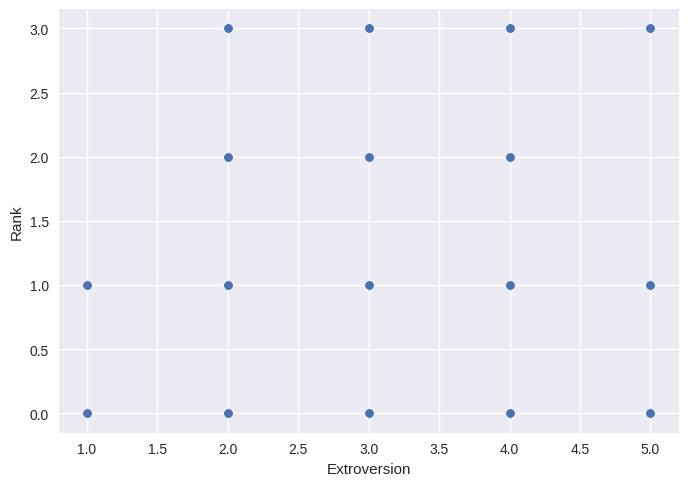

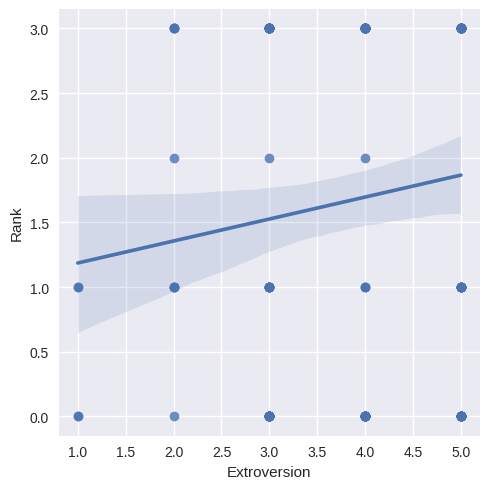

In [176]:
import seaborn as sns
df_corr['Extroversion'].corr(df_corr['Rank'])
sns.scatterplot(x="Extroversion", y="Rank", data=df_corr);
sns.lmplot(x="Extroversion", y="Rank", data=df_corr);

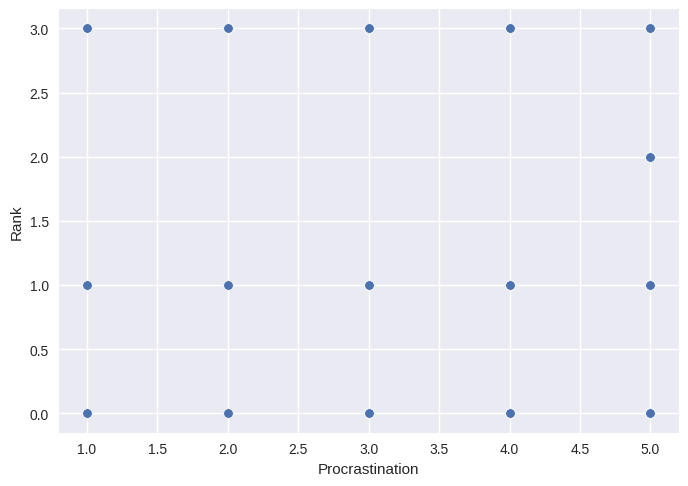

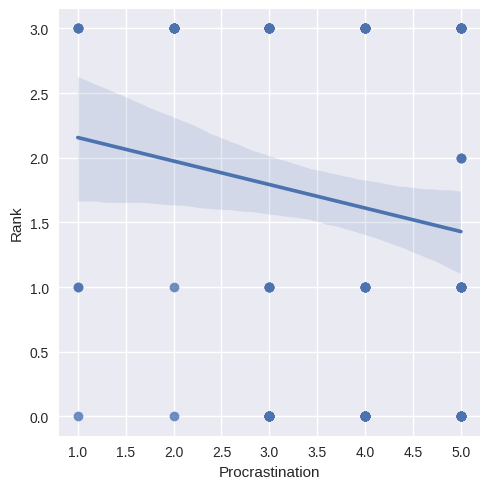

In [202]:
sns.scatterplot(x="Procrastination", y="Rank", data=df_corr);
sns.lmplot(x="Procrastination", y="Rank", data=df_corr);

In [205]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      170 non-null    int8   
 1   Gender                   170 non-null    object 
 2   Attendance               170 non-null    float64
 3   Failed_Courses           170 non-null    int64  
 4   Grade                    170 non-null    int8   
 5   Rank                     170 non-null    int8   
 6   Extroversion             170 non-null    int64  
 7   Calmness                 170 non-null    int64  
 8   Failure_Tolerance        170 non-null    int64  
 9   Self_Confidence          170 non-null    int64  
 10  Procrastination          170 non-null    int64  
 11  Self_Motivation          170 non-null    int64  
 12  Peer_Pressure            170 non-null    int64  
 13  Group_Study              170 non-null    int8   
 14  Peer_Support             1

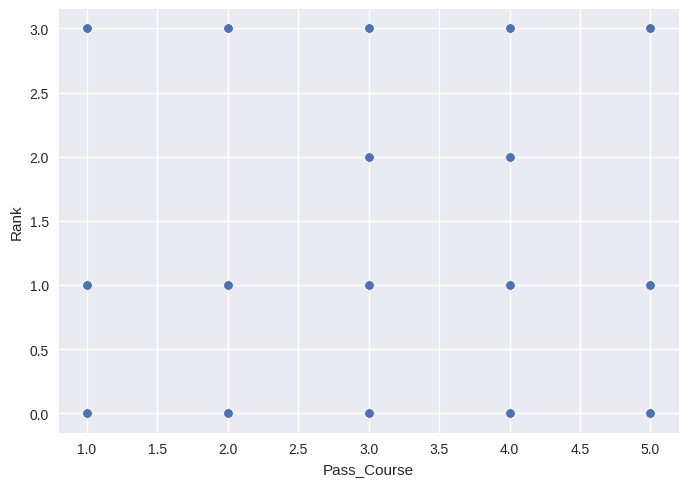

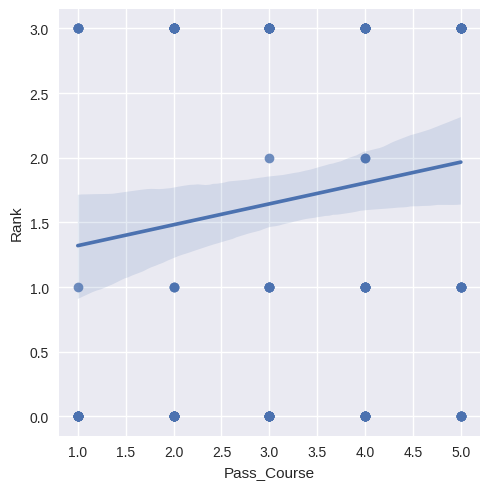

In [210]:
sns.scatterplot(x="Pass_Course", y="Rank", data=df_corr);
sns.lmplot(x="Pass_Course", y="Rank", data=df_corr);

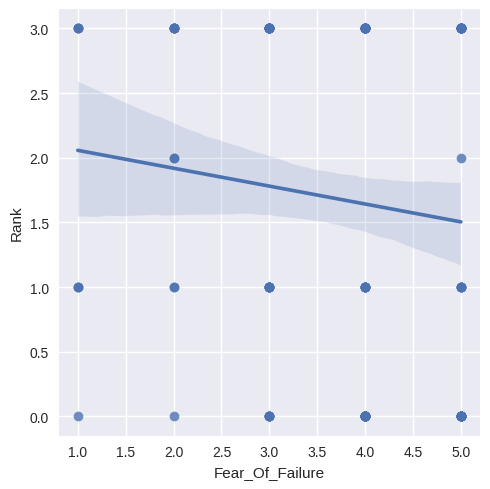

In [211]:
sns.lmplot(x="Fear_Of_Failure", y="Rank", data=df_corr);

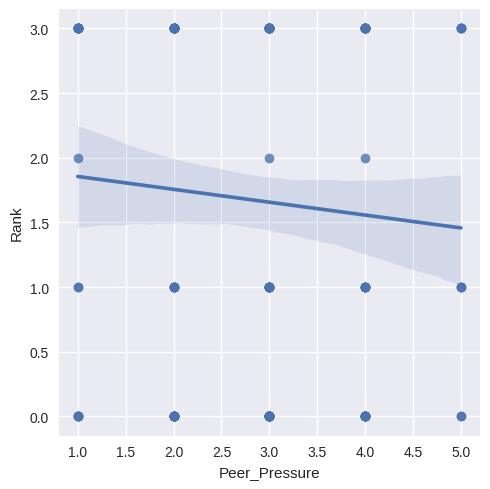

In [223]:
sns.lmplot(x="Peer_Pressure", y="Rank", data=df);

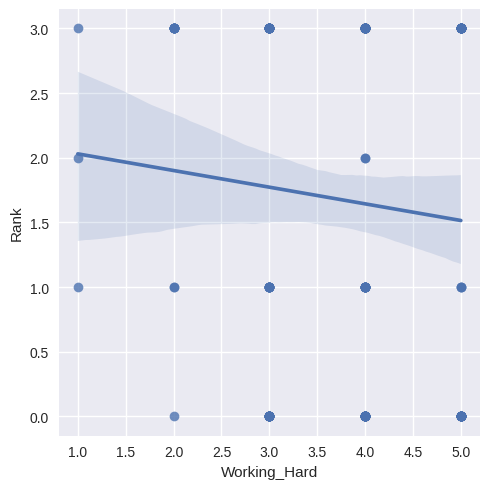

In [224]:
sns.lmplot(x="Working_Hard", y="Rank", data=df);

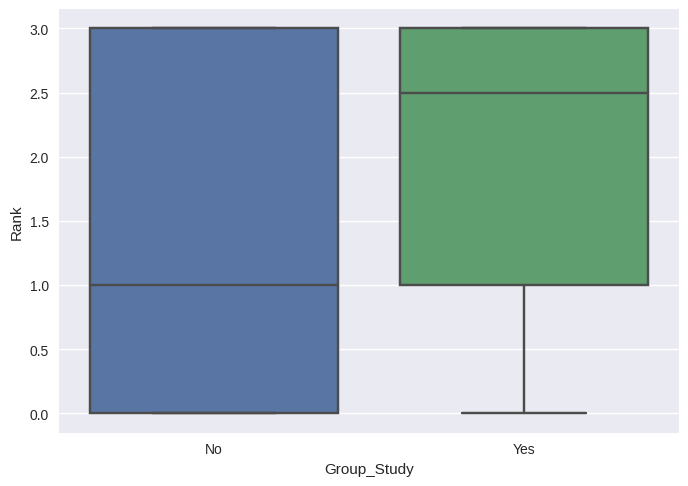

In [214]:
sns.boxplot(x='Group_Study', y='Rank', data=df);


<Axes: xlabel='Peer_Support', ylabel='Rank'>

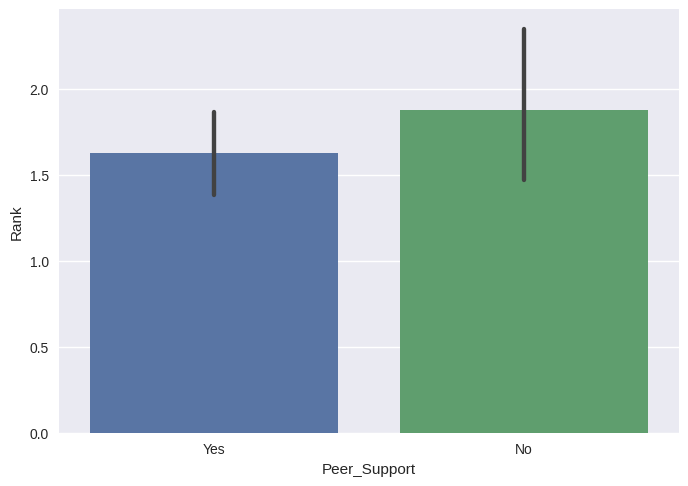

In [219]:
sns.barplot(data=df, x="Peer_Support", y="Rank")

<Axes: xlabel='Teacher_Self_Confidence', ylabel='Rank'>

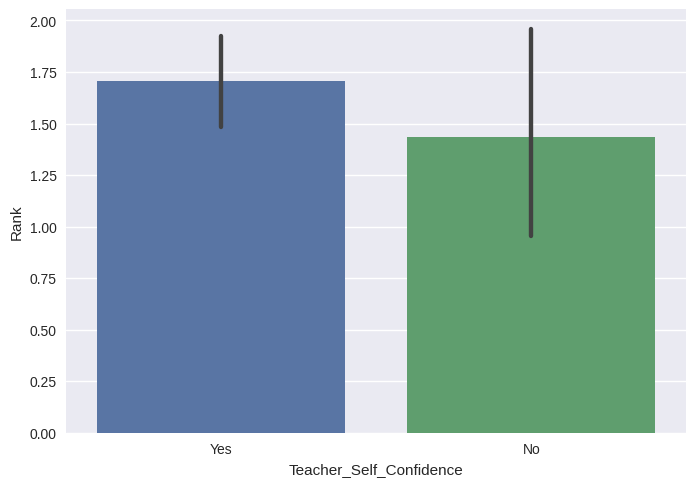

In [220]:
sns.barplot(data=df, x="Teacher_Self_Confidence", y="Rank")

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      169 non-null    category
 1   Gender                   170 non-null    object  
 2   Attendance               170 non-null    float64 
 3   Failed_Courses           170 non-null    int64   
 4   Grade                    170 non-null    object  
 5   Rank                     170 non-null    int8    
 6   Extroversion             170 non-null    int64   
 7   Calmness                 170 non-null    int64   
 8   Failure_Tolerance        170 non-null    int64   
 9   Self_Confidence          170 non-null    int64   
 10  Procrastination          170 non-null    int64   
 11  Self_Motivation          170 non-null    int64   
 12  Peer_Pressure            170 non-null    int64   
 13  Group_Study              170 non-null    object  
 14  Peer_Suppo

In [177]:
cormat = df_corr.corr()
round(cormat,3)

<ipython-input-177-ea059f1544b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_corr.corr()


,Age,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,Self_Confidence,Procrastination,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
Age,1.000,-0.041,0.118,0.022,-0.001,0.101,0.023,-0.066,0.069,-0.189,...,0.115,-0.124,0.010,-0.122,0.039,0.107,0.029,0.108,-0.001,0.164
Attendance,-0.041,1.000,-0.013,-0.225,0.041,0.189,0.223,-0.031,0.187,0.039,...,0.168,0.123,0.082,0.311,0.094,0.232,0.276,-0.127,-0.109,0.170
Failed_Courses,0.118,-0.013,1.000,0.390,0.028,0.010,0.077,0.198,0.053,0.104,...,-0.127,-0.180,-0.090,-0.118,-0.015,-0.243,-0.360,0.187,-0.017,-0.068
Grade,0.022,-0.225,0.390,1.000,0.370,-0.035,-0.064,0.044,-0.137,-0.088,...,-0.132,-0.142,-0.081,-0.189,0.029,-0.277,-0.103,0.321,0.169,0.021
Rank,-0.001,0.041,0.028,0.370,1.000,0.124,0.016,-0.010,0.013,-0.148,...,0.002,0.052,0.018,0.068,0.022,-0.107,-0.087,0.152,0.043,-0.030
Extroversion,0.101,0.189,0.010,-0.035,0.124,1.000,0.069,-0.046,0.434,-0.017,...,0.228,0.074,0.255,0.183,0.179,0.121,0.119,-0.022,-0.094,0.065
Calmness,0.023,0.223,0.077,-0.064,0.016,0.069,1.000,0.259,0.315,0.020,...,-0.024,0.111,0.054,0.155,-0.012,0.192,0.099,0.045,-0.086,-0.035
Failure_Tolerance,-0.066,-0.031,0.198,0.044,-0.010,-0.046,0.259,1.000,0.192,0.024,...,-0.093,-0.069,-0.103,-0.060,-0.068,-0.271,0.034,-0.049,-0.008,-0.080
Self_Confidence,0.069,0.187,0.053,-0.137,0.013,0.434,0.315,0.192,1.000,0.015,...,-0.017,-0.066,0.112,0.117,0.067,0.102,0.161,-0.152,-0.063,0.032
Procrastination,-0.189,0.039,0.104,-0.088,-0.148,-0.017,0.020,0.024,0.015,1.000,...,-0.149,-0.066,-0.132,0.022,-0.085,0.032,-0.130,0.023,-0.041,-0.064


<ipython-input-178-0c5fc80068de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_corr.corr()


<Axes: >

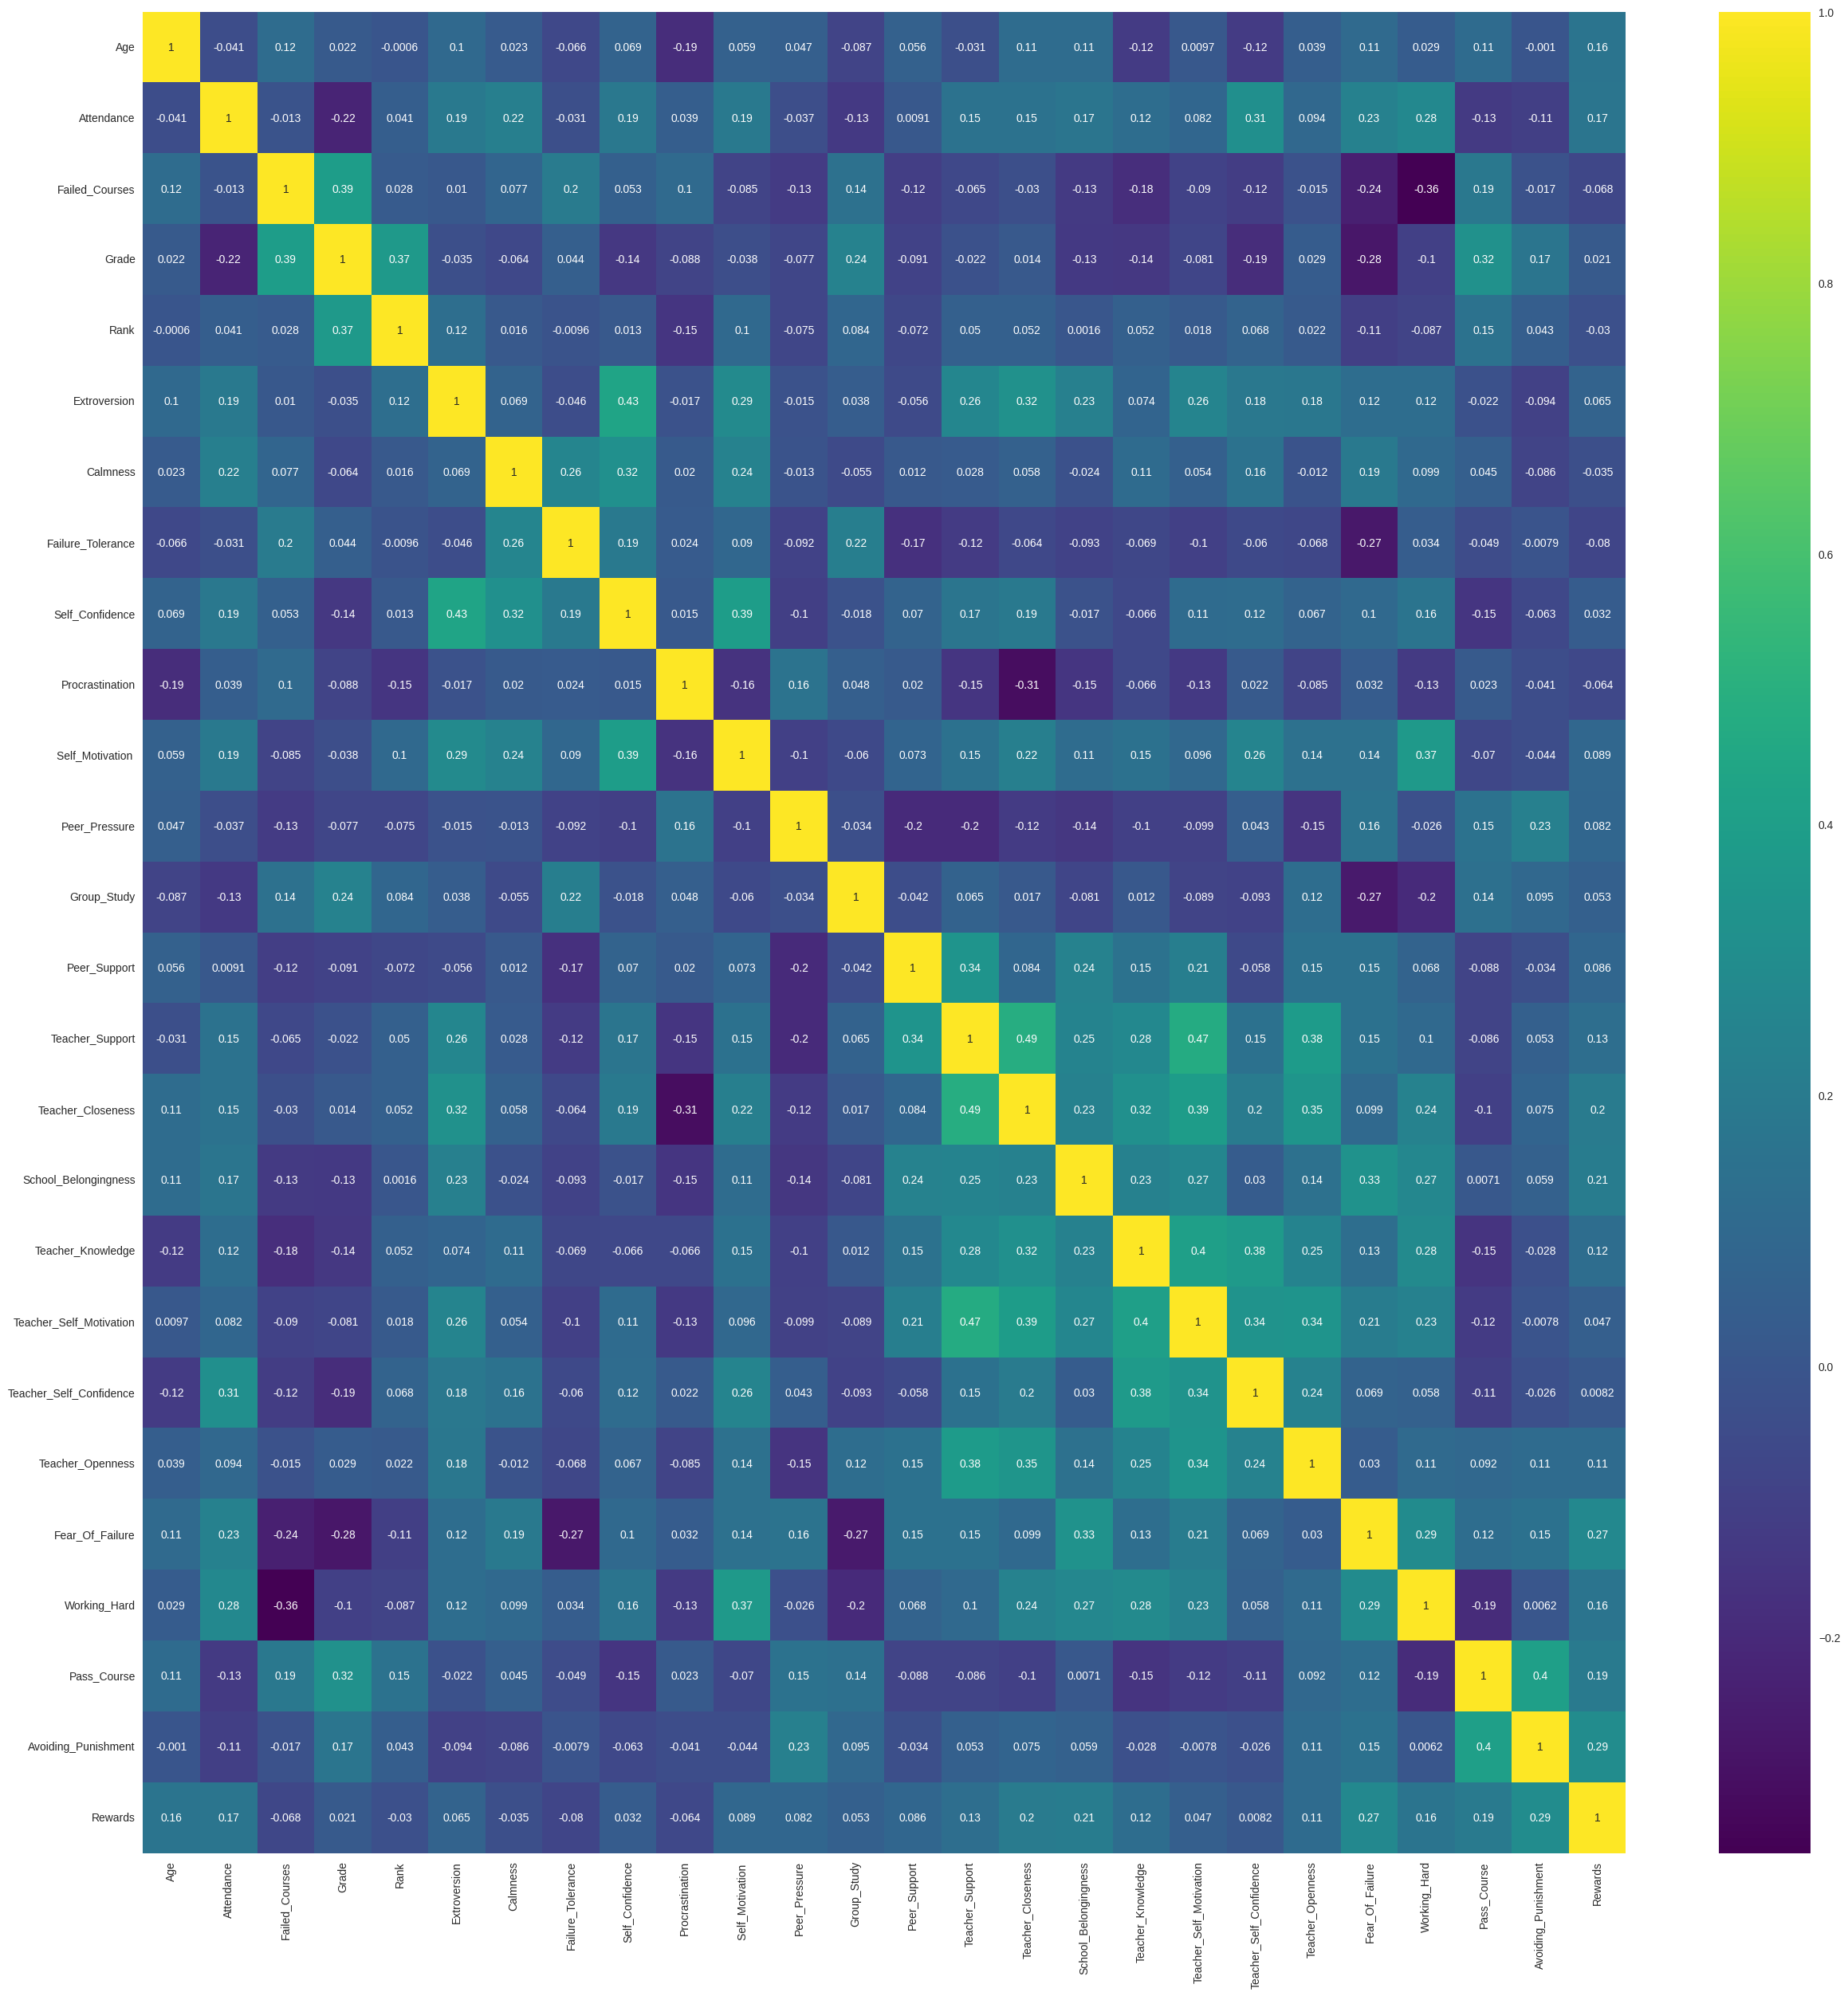

In [178]:
plt.figure(figsize=(30,30))

corr = df_corr.corr()
corr

sns.heatmap(corr, cmap='viridis', annot=True)

In [179]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [199]:
# Split the data into features (X) and target (y)
X = df_encoded.drop('Rank', axis=1)
y = df_encoded['Rank']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7352941176470589


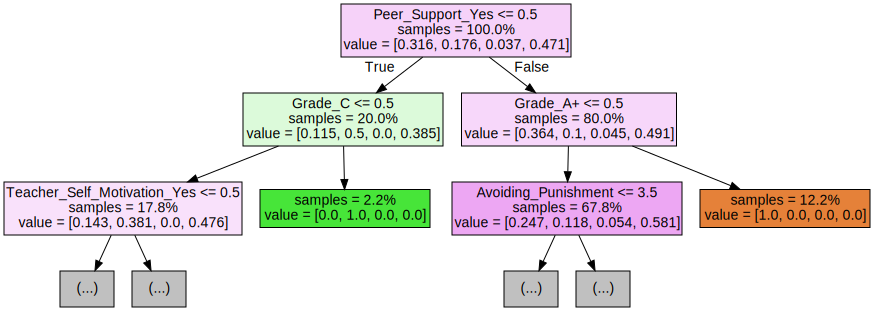

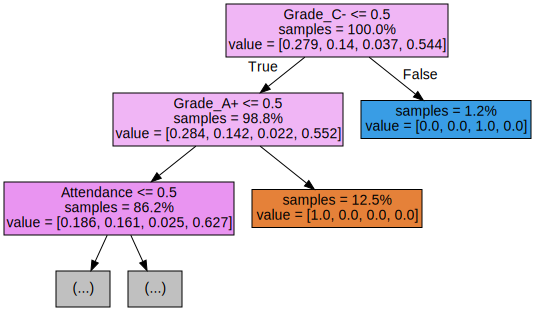

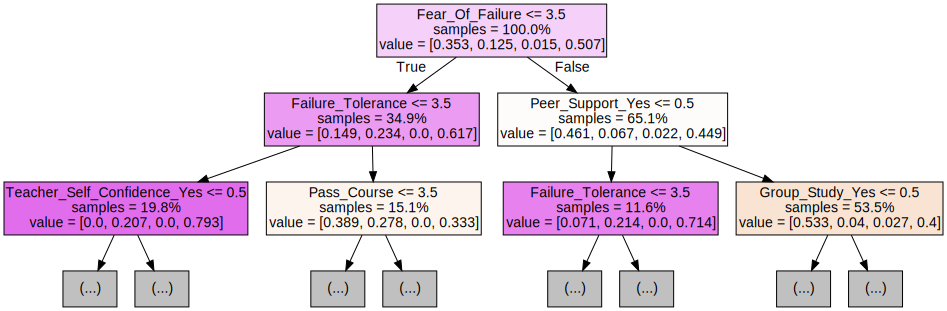

In [181]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

beginning of PCA

In [182]:

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [183]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [184]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [185]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [186]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

<ipython-input-187-db6bef8bffd0>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


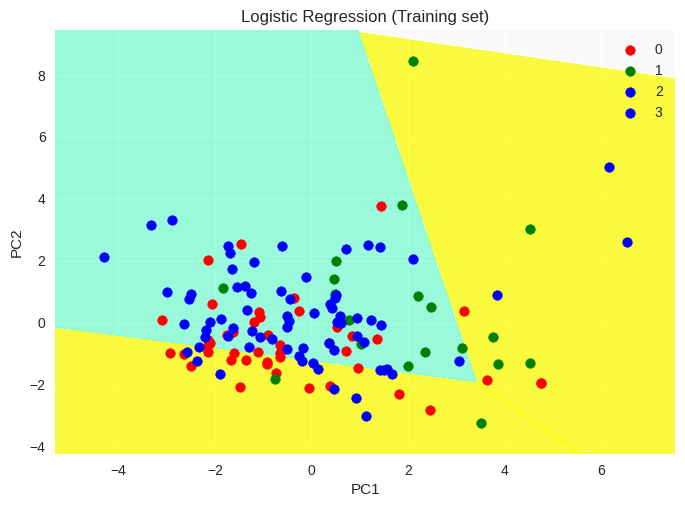

In [187]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

<ipython-input-188-9e08bc9942ac>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


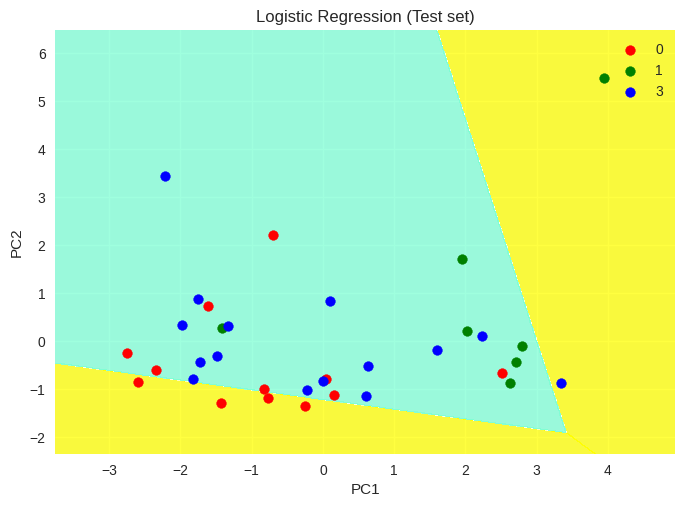

In [188]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

In [189]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5588235294117647
